In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=14 #10 #16 pour posts

In [2]:

#lecture des fichiers
obsinit=pd.DataFrame(data=np.loadtxt("results/init/obs.gnu"),columns=['x','y'])

obs2FD=pd.DataFrame(data=np.loadtxt("results/2FD/obs.gnu"),columns=['x','y'])
obs3FD=pd.DataFrame(data=np.loadtxt("results/3FD/obs.gnu"),columns=['x','y'])
obs4FD=pd.DataFrame(data=np.loadtxt("results/4FD/obs.gnu"),columns=['x','y'])

obs2ID=pd.DataFrame(data=np.loadtxt("results/2ID/obs.gnu"),columns=['x','y'])
obs3ID=pd.DataFrame(data=np.loadtxt("results/3ID/obs.gnu"),columns=['x','y'])
obs4ID=pd.DataFrame(data=np.loadtxt("results/4ID/obs.gnu"),columns=['x','y'])

obs2RD=pd.DataFrame(data=np.loadtxt("results/2RD/obs.gnu"),columns=['x','y1','y2'])
obs3RD=pd.DataFrame(data=np.loadtxt("results/3RD/obs.gnu"),columns=['x','y1','y2','y3','y4'])
obs4RD=pd.DataFrame(data=np.loadtxt("results/4RD/obs.gnu"),columns=['x','y1','y2','y3','y4','y5','y6','y7','y8'])



ValueError: Shape of passed values is (20, 6), indices imply (20, 9)

In [85]:
#test de fonction pour afficher automatiquement toutes les observations dans le cas RD.
def writeobs(ax,obsdf,color,marker,ps):
    for column in obsdf:
        if column!='x':
            ax.scatter(obsdf['x'],obsdf[column],color=color,marker=marker,s=ps)

NameError: name 'obsinit' is not defined

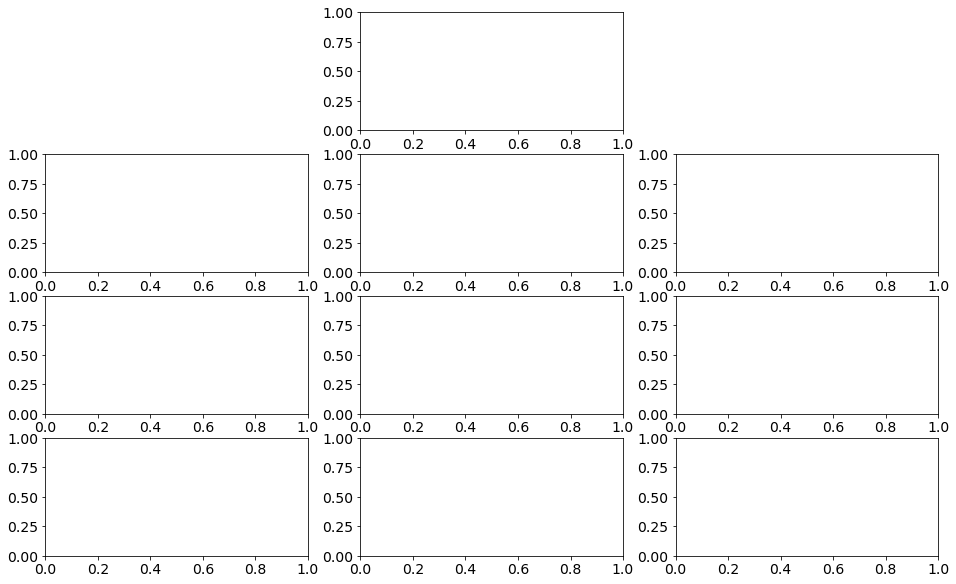

In [3]:
#affichage des plots des observations pour illustrer les différentes méthodes asymptotiques
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(ncols=3,nrows=4,figsize=[16,10])
fig.delaxes(ax1)
fig.delaxes(ax3)

cinit='tab:blue'
cfd='tab:red'
cid='tab:green'
crd='black'
ps=30
minit='o'
mfd='o'
mid='o'
mrd='o'

xlim=[-0.02,1]
ylim=[-2.2,2]

##scatters
ax2.scatter(obsinit['x'],obsinit['y'],color=cinit,marker=minit,s=ps)

ax5.scatter(obs2FD['x'],obs2FD['y'],color=cfd,marker=mfd,s=ps)
ax8.scatter(obs3FD['x'],obs3FD['y'],color=cfd,marker=mfd,s=ps)
ax11.scatter(obs4FD['x'],obs4FD['y'],color=cfd,marker=mfd,s=ps)

ax6.scatter(obs2ID['x'],obs2ID['y'],color=cid,marker=mid,s=ps)
ax9.scatter(obs3ID['x'],obs3ID['y'],color=cid,marker=mid,s=ps)
ax12.scatter(obs4ID['x'],obs4ID['y'],color=cid,marker=mid,s=ps)

writeobs(ax4,obs2RD,crd,mrd,ps)
writeobs(ax7,obs3RD,crd,mrd,ps)
writeobs(ax10,obs4RD,crd,mrd,ps)

##lims

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax4.set_xlim(xlim)
ax4.set_ylim(ylim)
ax5.set_xlim(xlim)
ax5.set_ylim(ylim)
ax7.set_xlim(xlim)
ax7.set_ylim(ylim)
ax8.set_xlim(xlim)
ax8.set_ylim(ylim)
ax10.set_xlim(xlim)
ax10.set_ylim(ylim)
ax11.set_xlim(xlim)
ax11.set_ylim(ylim)

#additional plots
y=ax6.get_ylim()
ax6.vlines(1,y[0],y[1],color='tab:grey',linestyle='--')
y=ax9.get_ylim()
ax9.vlines(1,y[0],y[1],color='tab:grey',linestyle='--')
y=ax12.get_ylim()
ax12.vlines(1,y[0],y[1],color='tab:grey',linestyle='--')


#titles
ax2.set_title("Initial observations")
ax4.set_title("Repeated Domain asymptotics")
ax5.set_title("Fixed Domain asymptotics")
ax6.set_title("Increasing Domain asymptotics")



ax4.set_ylabel (r'$n_{obs}=40$',rotation=0,labelpad=30)
ax7.set_ylabel (r'$n_{obs}=80$',rotation=0,labelpad=30)
ax10.set_ylabel (r'$n_{obs}=160$',rotation=0,labelpad=30)

plt.tight_layout()
ax2.set_ylabel (r'$n_{obs}=20$',rotation=0,labelpad=30)





In [27]:
#affichage des qqplots. loading des fichiers.
qqinit=pd.DataFrame(data=np.loadtxt("results/init/qqplot.gnu"),columns=['n','t','sigma','l'])

qq2FD=pd.DataFrame(data=np.loadtxt("results/2FD/qqplot.gnu"),columns=['n','t','sigma','l'])
qq3FD=pd.DataFrame(data=np.loadtxt("results/3FD/qqplot.gnu"),columns=['n','t','sigma','l'])
qq7FD=pd.DataFrame(data=np.loadtxt("results/7FD/qqplot.gnu"),columns=['n','t','sigma','l'])

qq2ID=pd.DataFrame(data=np.loadtxt("results/2ID/qqplot.gnu"),columns=['n','t','sigma','l'])
qq3ID=pd.DataFrame(data=np.loadtxt("results/3ID/qqplot.gnu"),columns=['n','t','sigma','l'])
qq7ID=pd.DataFrame(data=np.loadtxt("results/7ID/qqplot.gnu"),columns=['n','t','sigma','l'])

qq2RD=pd.DataFrame(data=np.loadtxt("results/2RD/qqplot.gnu"),columns=['n','t','sigma','l'])
qq3RD=pd.DataFrame(data=np.loadtxt("results/3RD/qqplot.gnu"),columns=['n','t','sigma','l'])
qq7RD=pd.DataFrame(data=np.loadtxt("results/7RD/qqplot.gnu"),columns=['n','t','sigma','l'])


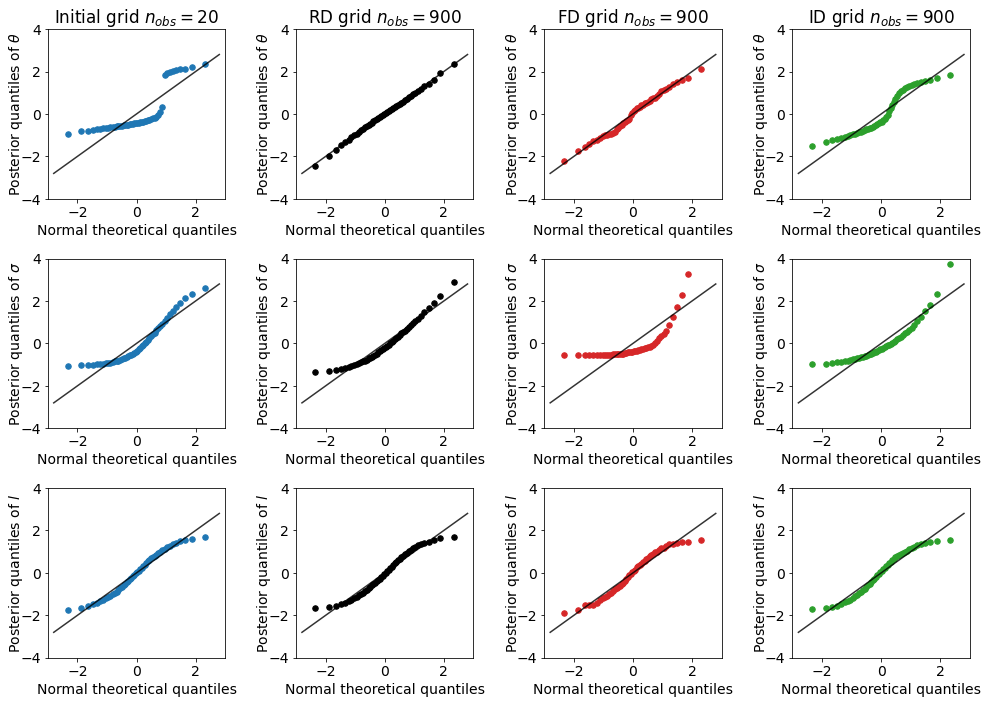

In [28]:
fig,axs=plt.subplots(ncols=4,nrows=3,figsize=[14,10])

xlim=[-3,3]
ylim=[-4,4]

ps=30

#plot de la bissectrice et set des xlim/ylim
X=np.linspace(-2.8,2.8,200)

for i, ax in enumerate(fig.axes):
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('Normal theoretical quantiles')
    ax.plot(X,X,color='black',alpha=0.8)

#qqplots
axs[0,0].scatter(qqinit['n'],qqinit['t'],color=cinit,marker=minit,s=ps)
axs[1,0].scatter(qqinit['n'],qqinit['sigma'],color=cinit,marker=minit,s=ps)
axs[2,0].scatter(qqinit['n'],qqinit['l'],color=cinit,marker=minit,s=ps)

axs[0,1].scatter(qq7RD['n'],qq7RD['t'],color=crd,marker=mrd,s=ps)
axs[1,1].scatter(qq7RD['n'],qq7RD['sigma'],color=crd,marker=mrd,s=ps)
axs[2,1].scatter(qq7RD['n'],qq7RD['l'],color=crd,marker=mrd,s=ps)

axs[0,2].scatter(qq7FD['n'],qq7FD['t'],color=cfd,marker=mfd,s=ps)
axs[1,2].scatter(qq7FD['n'],qq7FD['sigma'],color=cfd,marker=mfd,s=ps)
axs[2,2].scatter(qq7FD['n'],qq7FD['l'],color=cfd,marker=mfd,s=ps)

axs[0,3].scatter(qq7ID['n'],qq7ID['t'],color=cid,marker=mid,s=ps)
axs[1,3].scatter(qq7ID['n'],qq7ID['sigma'],color=cid,marker=mid,s=ps)
axs[2,3].scatter(qq7ID['n'],qq7ID['l'],color=cid,marker=mid,s=ps)

#labels
tlabel=r'Posterior quantiles of $\theta$'
slabel=r'Posterior quantiles of $\sigma$'
llabel=r'Posterior quantiles of $l$'

for i in range(4):
    lp=-5
    axs[0,i].set_ylabel(tlabel,labelpad=lp)
    axs[1,i].set_ylabel(slabel,labelpad=lp)
    axs[2,i].set_ylabel(llabel,labelpad=lp)
    
axs[0,0].set_title(r'Initial grid $n_{obs}=20$')
axs[0,1].set_title(r'RD grid $n_{obs}=900$')
axs[0,2].set_title(r'FD grid $n_{obs}=900$')
axs[0,3].set_title(r'ID grid $n_{obs}=900$')

    
plt.tight_layout()

In [159]:
#fonction pour afficher une postérieure
def plot_post(filename):
    df=pd.DataFrame(data=np.loadtxt(filename),columns=['theta','sigma','l'])
    fig,axs=plt.subplots(nrows=1,ncols=3,figsize=[16,6])
    nbins=20
    axs[0].hist(df['theta'],bins=nbins)
    axs[1].hist(df['sigma'],bins=nbins)
    axs[2].hist(df['l'],bins=nbins)

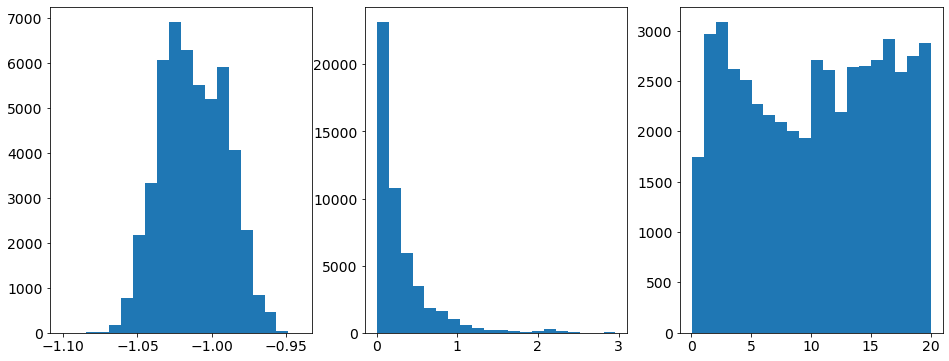

In [160]:
filename="results/4ID/samples.gnu"
plot_post(filename)

In [136]:
def plot_autocor(filename):
    df=pd.DataFrame(data=np.loadtxt(filename),columns=['theta','sigma','l'])
    fig,axs=plt.subplots(nrows=1,ncols=3,figsize=[16,6])
    nbins=20
    x=range(len(df['theta']))
    axs[0].plot(x,df['theta'])
    axs[1].plot(x,df['sigma'])
    axs[2].plot(x,df['l'])

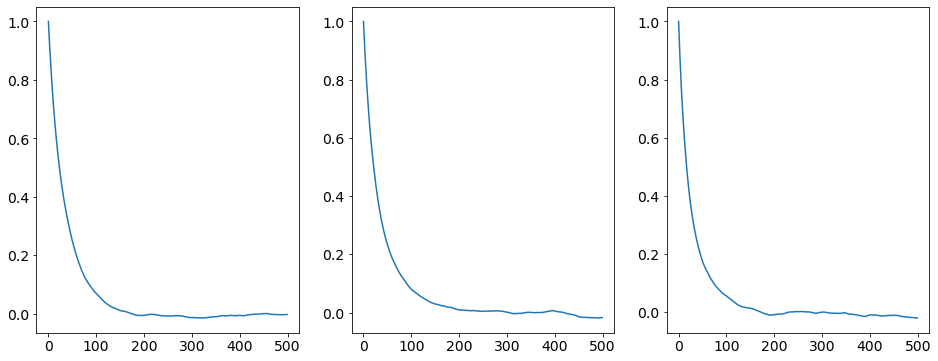

In [161]:
filename="results/init/autocor.gnu"
plot_autocor(filename)

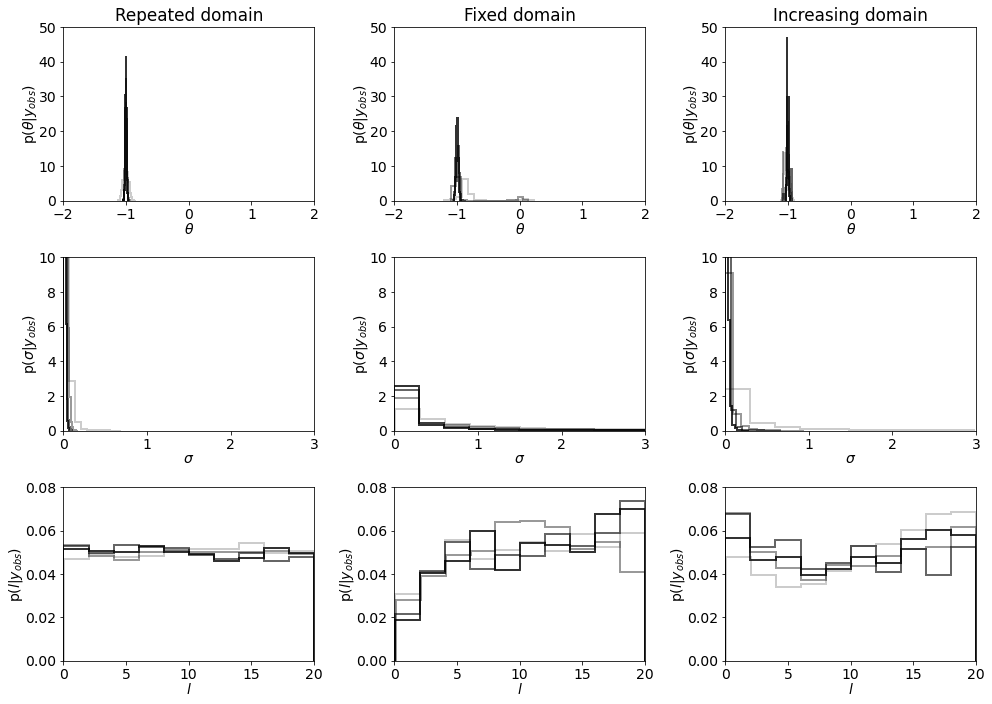

In [34]:
#affichage des densités avec très grand nombre d'observations.





ps=30
#fonction pour plotter un dataframe

def plot_hists(filenamelist,axs):
    #names: liste de 4 noms avec les fichiers
    #axs: liste de 3 axes sur lesquels on plotte les histogrammes
    #lapha: suite des alpha des histogrammes.
    lalpha=[0.2,0.4,0.6,0.8]
    lw=2
    nbins=15
    for idx,filename in enumerate(filenamelist):
        df=pd.DataFrame(data=np.loadtxt(filename),columns=['theta','sigma','l'])
        axs[0].hist(df['theta'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],bins=nbins,density=True)
        axs[1].hist(df['sigma'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],density=True)
        axs[2].hist(df['l'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],density=True)
    

flistID=["results/4ID/samples.gnu",
       "results/5ID/samples.gnu",
       "results/6ID/samples.gnu",
       "results/7ID/samples.gnu"
      ]
flistRD=["results/4RD/samples.gnu",
       "results/5RD/samples.gnu",
       "results/6RD/samples.gnu",
       "results/7RD/samples.gnu"
      ]
flistFD=["results/4FD/samples.gnu",
       "results/5FD/samples.gnu",
       "results/6FD/samples.gnu",
       "results/7FD/samples.gnu"
      ]


fig,axs=plt.subplots(ncols=3,nrows=3,figsize=[14,10])

#qqplots


plot_hists(flistRD,[axs[0,0],axs[1,0],axs[2,0]])
plot_hists(flistFD,[axs[0,1],axs[1,1],axs[2,1]])
plot_hists(flistID,[axs[0,2],axs[1,2],axs[2,2]])



#labels
tlabel=r'p$(\theta|y_{obs})$'
slabel=r'p$(\sigma|y_{obs})$'
llabel=r'p$(l|y_{obs})$'

txlabel=r'$\theta$'
sxlabel=r'$\sigma$'
lxlabel=r'$l$'

xlim_t=[-2,2]
ylim_t=[0,50]
xlim_s=[0,3]
ylim_s=[0,10]
xlim_l=[0,20]
ylim_l=[0,8e-2]

for i in range(3):
    lp=0
    lpx=0
    axs[0,i].set_ylabel(tlabel,labelpad=lp)
    axs[0,i].set_xlabel(txlabel,labelpad=lpx)
    axs[0,i].set_xlim(xlim_t)
    axs[0,i].set_ylim(ylim_t)
    axs[1,i].set_ylabel(slabel,labelpad=lp)
    axs[1,i].set_xlabel(sxlabel,labelpad=lpx)
    axs[1,i].set_xlim(xlim_s)
    axs[1,i].set_ylim(ylim_s)
    axs[2,i].set_ylabel(llabel,labelpad=lp)
    axs[2,i].set_xlabel(lxlabel,labelpad=lpx)
    axs[2,i].set_xlim(xlim_l)
    axs[2,i].set_ylim(ylim_l)
    
axs[0,0].set_title(r'Repeated domain')
axs[0,1].set_title(r'Fixed domain')
axs[0,2].set_title(r'Increasing domain')

    
plt.tight_layout()

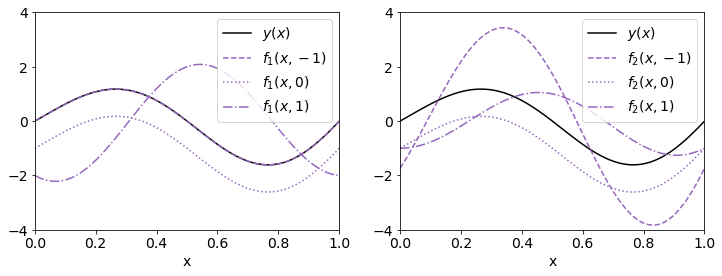

In [21]:
#affichage
#plot pour donner une idée du modèle



def y(x):
    return np.exp(2*3.14*x/10)*np.sin(2*3.14*x)

def f1(x,theta):
    #well specified
    return y(x)-np.abs(theta+1)*(np.sin(2*3.14*theta*x)+np.cos(2*3.14*x*theta))

def f2(x,theta):
    #misspecified
    return y(x)-np.sqrt(theta**2-theta+1)*(np.sin(2*3.14*theta*x)+np.cos(2*3.14*x*theta))

X=np.linspace(0,1,100)
fig,axs=plt.subplots(figsize=[12,4],ncols=2,nrows=1)
axs[0].plot(X,y(X),color='black',label=r'$y(x)$')
axs[0].plot(X,f1(X,-1),color='tab:purple',label=r'$f_1(x,-1)$',linestyle='--')
axs[0].plot(X,f1(X,0),color='tab:purple',label=r'$f_1(x,0)$',linestyle=':')
axs[0].plot(X,f1(X,1),color='tab:purple',label=r'$f_1(x,1)$',linestyle='-.')
axs[0].set_xlim([0,1])
#ax.set_ylim([0,1.1])
axs[0].set_xlabel('x')

axs[1].plot(X,y(X),color='black',label=r'$y(x)$')
axs[1].plot(X,f2(X,-1),color='tab:purple',label=r'$f_2(x,-1)$',linestyle='--')
axs[1].plot(X,f2(X,0),color='tab:purple',label=r'$f_2(x,0)$',linestyle=':')
axs[1].plot(X,f2(X,1),color='tab:purple',label=r'$f_2(x,1)$',linestyle='-.')
axs[1].set_xlim([0,1])
axs[0].set_ylim([-4,4])
axs[1].set_ylim([-4,4])
axs[1].set_xlabel('x')
axs[1].legend()
axs[0].legend()

